### Plot data from pkl file
- Segmentation was processed in PC uses contour method

In [28]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
sumPath = '/Volumes/genie/Jihong_GENIE_stuff/S2_cell_sensor_expression/Arthur jGCaMP8 ionomycin data'
# sumPath = '/Users/zhengj10/Desktop/S2_jGCaMP8_ionomycin'
date = '20230407_S2_NikonEclipse_ionomycin'
savePath = '/Volumes/genie/Presentations/Jihong/GENIE production/230411/S2 cell Arthur jGCaMP8 ionomycin data'
# savePath = '/Users/zhengj10/Desktop/S2 cell Arthur jGCaMP8 ionomycin data'
if not os.path.exists(savePath):
    os.makedirs(savePath)
os.path.exists(sumPath)

True

### Load pkl file

In [31]:
df = pd.read_pickle(os.path.join(sumPath,date,'summary.pkl'))
df.columns

Index(['Well', 'Construct', 'Pixels_r', 'Pixels_g', 'Pixels_r_ion',
       'Pixels_g_ion', 'Protocol'],
      dtype='object')

In [32]:
df.shape

(2031, 7)

In [5]:
df['ratio_ctr'] = df['Pixels_g']/df['Pixels_r']

In [6]:
df['ratio_ion'] = df['Pixels_g_ion']/df['Pixels_r_ion']

In [7]:
df['ratio_ctr'].mean()

0.25141019356155814

In [8]:
df['ratio_ion'].mean()

0.5969346001134886

### Violin plot
- Pixel value of tdTomato channel
- Pixel value of GFP channel
- Pixel value ratio

In [9]:
Construct = []
for i,r in df.iterrows():
    Construct.append(r['Construct'].replace('dot','.'))

In [10]:
df['Construct_ID'] = Construct

In [11]:
df_ratio = pd.DataFrame()
Construct = []
Condition = []
Ratio = []
for i,r in df.iterrows():
    Construct.append(r['Construct'].replace('dot','.'))
    Condition.append('Control')
    Ratio.append(r['ratio_ctr'])
    
    Construct.append(r['Construct'].replace('dot','.'))
    Condition.append('Ionomycin ')
    Ratio.append(r['ratio_ion'])

In [12]:
df_ratio['Construct'] = Construct
df_ratio['Condition'] = Condition
df_ratio['GFP to tdTomato ratio'] = Ratio

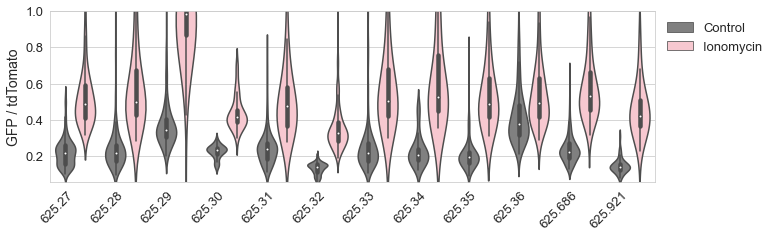

In [14]:
sns.set_style('whitegrid')
# plt.figure(figsize=(9,3.5))
plt.figure(figsize=(11,3.5))
plt.rc('font',size=13)
ax1 = plt.subplot(111)
sns.violinplot(ax = ax1,data=df_ratio,x='Construct',y='GFP to tdTomato ratio',scale='width',hue='Condition',
              palette=['gray','pink'])

plt.xticks(rotation=45,ha='right')
a = np.quantile(df_ratio['GFP to tdTomato ratio'],0.001)
# a = ax1.get_ylim()[0]
b = np.quantile(df_ratio['GFP to tdTomato ratio'],0.95)
ax1.set_ylim([a,b])

ax1.set_xlabel('')
ax1.set_ylabel('GFP / tdTomato',size=14)
ax1.legend(frameon=False,bbox_to_anchor = [1,1]).set_title('')

plt.tight_layout()
plt.savefig(savePath+'/ratio.svg', format='svg')
plt.show()

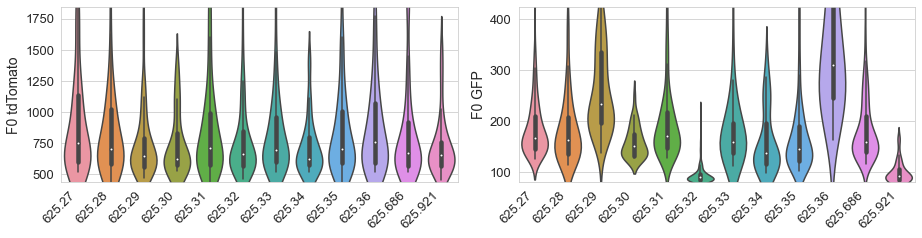

In [15]:
plt.figure(figsize=(13,3.5))
ax1 = plt.subplot(121)
sns.violinplot(ax = ax1, data=df, x='Construct_ID', y='Pixels_r', scale='width')

plt.xticks(rotation=45,ha='right')

a = np.quantile(df['Pixels_r'],0.001)
# a = ax1.get_ylim()[0]
b = np.quantile(df['Pixels_r'],0.95)
ax1.set_ylim([a,b])

ax1.set_xlabel('')
ax1.set_ylabel('F0 tdTomato',size=14)

plt.tick_params(labelsize=13)

ax2 = plt.subplot(122)
sns.violinplot(ax = ax2, data=df, x='Construct_ID', y='Pixels_g', scale='width')

plt.xticks(rotation=45,ha='right')

a = np.quantile(df['Pixels_g'],0.001)
# a = ax2.get_ylim()[0]
b = np.quantile(df['Pixels_g'],0.95)
ax2.set_ylim([a,b])

ax2.set_xlabel('')
ax2.set_ylabel('F0 GFP',size=14)

plt.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig(savePath+'/F0_GFP&tdTomato.svg', format='svg')
plt.show()

# ax2 = plt.subplot(312)
# sns.violinplot(ax = ax2, data=df, x='Construct', y='Pixels_gfp', scale='width', width=0.5)
# plt.xticks(rotation=45,ha='right')
# # print(ax2.get_ylim())

# # ax2.set_ylim([-100,400]) # for 4x
# # ax2.set_ylim([-430,1000]) # for 10x
# ax2.set_ylim([500,7500])

# ax2.set_xlabel('')
# ax2.set_ylabel('Pixels_GFP',size=14)

# plt.tick_params(labelsize=13)

# ax3 = plt.subplot(313)
# sns.violinplot(ax = ax3, data=df, x='Construct', y='Pixels_ratio', scale='width', width=0.5)
# plt.xticks(rotation=45,ha='right')
# # print(ax3.get_ylim())

# # ax3.set_ylim([-4,15])
# # ax3.set_ylim([-9,25])
# ax3.set_ylim([0,2.2])
# ax3.set_xlabel('')
# ax3.set_ylabel('Pixels_ratio',size=14)

# plt.tick_params(labelsize=13)

# plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/violin.pdf',format='pdf')
# plt.show()

### Compare no. of rois for different wells (evaporation issue for 230407 data)

In [27]:
W = []
No_ROI = []
for w in df['Well'].unique():
    print(w,df[df['Well']==w]['Construct'].unique(),len(df[df['Well']==w]))
    W.append(w)
    No_ROI.append(len(df[df['Well']==w]))

A01 ['625dot27'] 254
A02 ['625dot28'] 192
A03 ['625dot29'] 152
A04 ['625dot30'] 35
A05 ['625dot31'] 178
A06 ['625dot32'] 283
B01 ['625dot33'] 190
B02 ['625dot34'] 36
B03 ['625dot35'] 209
B04 ['625dot36'] 258
B05 ['625dot686'] 185
B06 ['625dot921'] 59


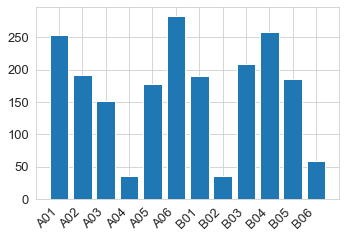

In [26]:
plt.figure(figsize=[5,3.5])
plt.bar(W,No_ROI)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.savefig(savePath+'/No_ROIs.svg',format='svg')
plt.show()

In [50]:
# A = df[df['Construct']=='625.688'].Pixels_tdt.to_list()

In [52]:
# f = plt.hist(A,bins=100)
# plt.hist?

In [ ]:
# df = pd.read_pickle(imgPath+'/contour_method_0916_4x.pkl')

In [ ]:
# df.construct.unique()
# df
# df['construct'] = df['construct'].str.replace('dot','.')

In [ ]:
# df_ordered = pd.DataFrame()

In [ ]:
# sensors = ['625.641 (6s)','625.1473 (7s)','625.1561 (7b)','625.1513 (7c)','625.921 (7f)','625.5 (8s)','625.688 (8s)','625.686 (8m)',
# '625.456 (8f)','625.712 (.712)','625.429 (high F0 8 siblings)','625.430 (high F0 8 siblings)','625.474 (high F0 8 siblings)',
# '625.479 (high F0 8 siblings)','625.568 (high F0 8 siblings)','625.644 (high F0 8 siblings)','625.725 (8s+RSET)',
# '625.734 (8s K11R)','625.728 (8s K15R)','625.731 (8s K93R)','625.737 (8s K170R)','625.11 (8s K422R)','625.12 (8s K422del)',
# '625.13 (8s ubiquitin)','625.14 (8s Kozak + 4G)','625.16 (XCaMP-Gf0)']

In [ ]:
# tick_labels = []
# for sensor in sensors:
#     result = sensor.index(' ')

#     if sensor[:result] in df.construct.unique():
#         print(sensor[:result])
#         tick_labels.append(sensor)
#         df_ordered = df_ordered.append(df[df.construct == sensor[:result]])

In [ ]:
# df_ordered

In [ ]:
# import seaborn as sns
# plt.figure(figsize=(12,14))
# ax1 = plt.subplot(311)
# sns.violinplot(ax = ax1, data=df_ordered, x='construct', y='pixels_mch', scale='width', width=0.5)


# plt.xticks(rotation=45,ha='right')
# # print(ax1.get_ylim())

# # ax1.set_ylim([18,40]) # for 4x
# # ax1.set_ylim([13,60]) # for 10x
# ax1.set_ylim([95,120])

# ax1.set_xlabel('',size=14)
# ax1.set_ylabel('Pixels_mCh',size=14)
# ax1.set_xticklabels(tick_labels)

# plt.tick_params(labelsize=13)

# ax2 = plt.subplot(312)
# sns.violinplot(ax = ax2, data=df_ordered, x='construct', y='pixels_gfp', scale='width', width=0.5)
# plt.xticks(rotation=45,ha='right')
# # print(ax2.get_ylim())

# # ax2.set_ylim([-100,400]) # for 4x
# # ax2.set_ylim([-430,1000]) # for 10x
# ax2.set_ylim([125,250])

# ax2.set_xlabel('',size=14)
# ax2.set_ylabel('Pixels_GFP',size=14)
# ax2.set_xticklabels(tick_labels)

# plt.tick_params(labelsize=13)

# ax3 = plt.subplot(313)
# sns.violinplot(ax = ax3, data=df_ordered, x='construct', y='pixels_ratio', scale='width', width=0.5)
# plt.xticks(rotation=45,ha='right')
# # print(ax3.get_ylim())

# # ax3.set_ylim([-4,15])
# # ax3.set_ylim([-9,25])
# ax3.set_ylim([1.2,2.5])
# ax3.set_xlabel('',size=14)
# ax3.set_ylabel('Pixels_ratio',size=14)
# ax3.set_xticklabels(tick_labels)

# plt.tick_params(labelsize=13)

# plt.tight_layout()
# # plt.savefig('/groups/genie/genie/GECIScreenData/GECI_Imaging_Data/Non-production/20210916_S2_raw/20210916-S2_cells/violin_contour_method.png',dpi=1200)
# plt.show()

In [ ]:
1600*400/80

In [ ]:
8000/16000